In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import math

Weather Data Source : https://www.ncei.noaa.gov/cdo-web/search 

air quality data source: https://www.baaqmd.gov/

In [2]:
la = pd.read_csv('los_angeles.csv')
hayward = pd.read_csv('hayward.csv')

miami = pd.read_csv('miami.csv')

WSF2 - Fastest 2-minute wind speed
SNOW - Snowfall
WT03 - Thunder
PRCP - Precipitation
WT05 - Hail (may include small hail)
WT16 - Rain (may include freezing rain, drizzle, and freezing drizzle)"
WT07 - Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction
WT08 - Smoke or haze
WT19 - Unknown source of precipitation
WT09 - Blowing or drifting snow
WDF2 - Direction of fastest 2-minute wind
AWND - Average wind speed
WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
TMAX - Maximum temperature
WT02 - Heavy fog or heaving freezing fog (not always distinguished from fog)
WT13 - Mist
TAVG - Average Temperature.
TMIN - Minimum temperature

In [3]:
columns = ['DATE', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WSF2']
la = la[columns]
miami = miami[columns]

miami.TAVG = (miami.TMAX + miami.TMIN)/2
la.TAVG = (la.TMAX + la.TMIN)/2

la = la.dropna()
miami = miami.dropna()

miami.DATE = pd.to_datetime(miami.DATE)
la.DATE = pd.to_datetime(la.DATE)

data = [miami, la]
for d in data:
    d['MONTH'] = pd.DatetimeIndex(d.DATE).month
    d['YEAR'] = pd.DatetimeIndex(d.DATE).year
    d['TDIFF'] = d.TMAX - d.TMIN
    d['DAYOFYEAR'] = pd.DatetimeIndex(d.DATE).dayofyear
    d['WDF2'] = np.deg2rad(d['WDF2'])
    d['MY'] = np.zeros(len(d))
    for i in range(len(d)):
        d['MY'].iloc[i] = str(d.MONTH.iloc[i]) + '-' + str(d.YEAR.iloc[i])


/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/2622144905.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['MY'].iloc[i] = str(d.MONTH.iloc[i]) + '-' + str(d.YEAR.iloc[i])
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/2622144905.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['MY'].iloc[i] = str(d.MONTH.iloc[i]) + '-' + str(d.YEAR.iloc[i])


In [4]:
# converting wind direction as an angle from x axis instead of north direction
miami.WDF2 = -math.pi/2 - miami.WDF2
la.WDF2 = -math.pi/2 - la.WDF2

In [5]:
# Grouped by year
miami_annual_avg = miami.groupby('YEAR').mean().reset_index(drop=True)
la_annual_avg = la.groupby('YEAR').mean().reset_index(drop=True)
miami_annual_max = miami.groupby('YEAR').max().reset_index(drop=True)
la_annual_max = la.groupby('YEAR').max().reset_index(drop=True)
miami_annual_min = miami.groupby('YEAR').min().reset_index(drop=True)
la_annual_min = la.groupby('YEAR').min().reset_index(drop=True)
miami_annual_sum = miami.groupby('YEAR').sum().reset_index(drop=True)
la_annual_sum = la.groupby('YEAR').sum().reset_index(drop=True)

/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/3786912698.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  miami_annual_avg = miami.groupby('YEAR').mean().reset_index(drop=True)
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/3786912698.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  la_annual_avg = la.groupby('YEAR').mean().reset_index(drop=True)
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/3786912698.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False

In [6]:
# Grouped by month
miami_monthly_avg = miami.groupby('MONTH').mean().reset_index(drop=True)
la_monthly_avg = la.groupby('MONTH').mean().reset_index(drop=True)
miami_monthly_max = miami.groupby('MONTH').max().reset_index(drop=True)
la_monthly_max = la.groupby('MONTH').max().reset_index(drop=True)
miami_monthly_min = miami.groupby('MONTH').min().reset_index(drop=True)
la_monthly_min = la.groupby('MONTH').min().reset_index(drop=True)
miami_monthly_sum = miami.groupby('MONTH').sum().reset_index(drop=True)
la_monthly_sum = la.groupby('MONTH').sum().reset_index(drop=True)
miami_monthly_std = miami.groupby('MONTH').std().reset_index(drop=True)
la_monthly_std = la.groupby('MONTH').std().reset_index(drop=True)

/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/1462006631.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  miami_monthly_avg = miami.groupby('MONTH').mean().reset_index(drop=True)
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/1462006631.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  la_monthly_avg = la.groupby('MONTH').mean().reset_index(drop=True)
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/1462006631.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to F

In [7]:
# Grouped by day
miami_daily_avg = miami.groupby('DAYOFYEAR').mean().reset_index(drop=True)
la_daily_avg = la.groupby('DAYOFYEAR').mean().reset_index(drop=True)
miami_daily_max = miami.groupby('DAYOFYEAR').max().reset_index(drop=True)
la_daily_max = la.groupby('DAYOFYEAR').max().reset_index(drop=True)
miami_daily_min = miami.groupby('DAYOFYEAR').min().reset_index(drop=True)
la_daily_min = la.groupby('DAYOFYEAR').min().reset_index(drop=True)

/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/293392526.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  miami_daily_avg = miami.groupby('DAYOFYEAR').mean().reset_index(drop=True)
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/293392526.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  la_daily_avg = la.groupby('DAYOFYEAR').mean().reset_index(drop=True)


### Temperature

In [8]:
c_miami = 'yellow'
c_la = 'lime'
fc = (0,0,0.3)

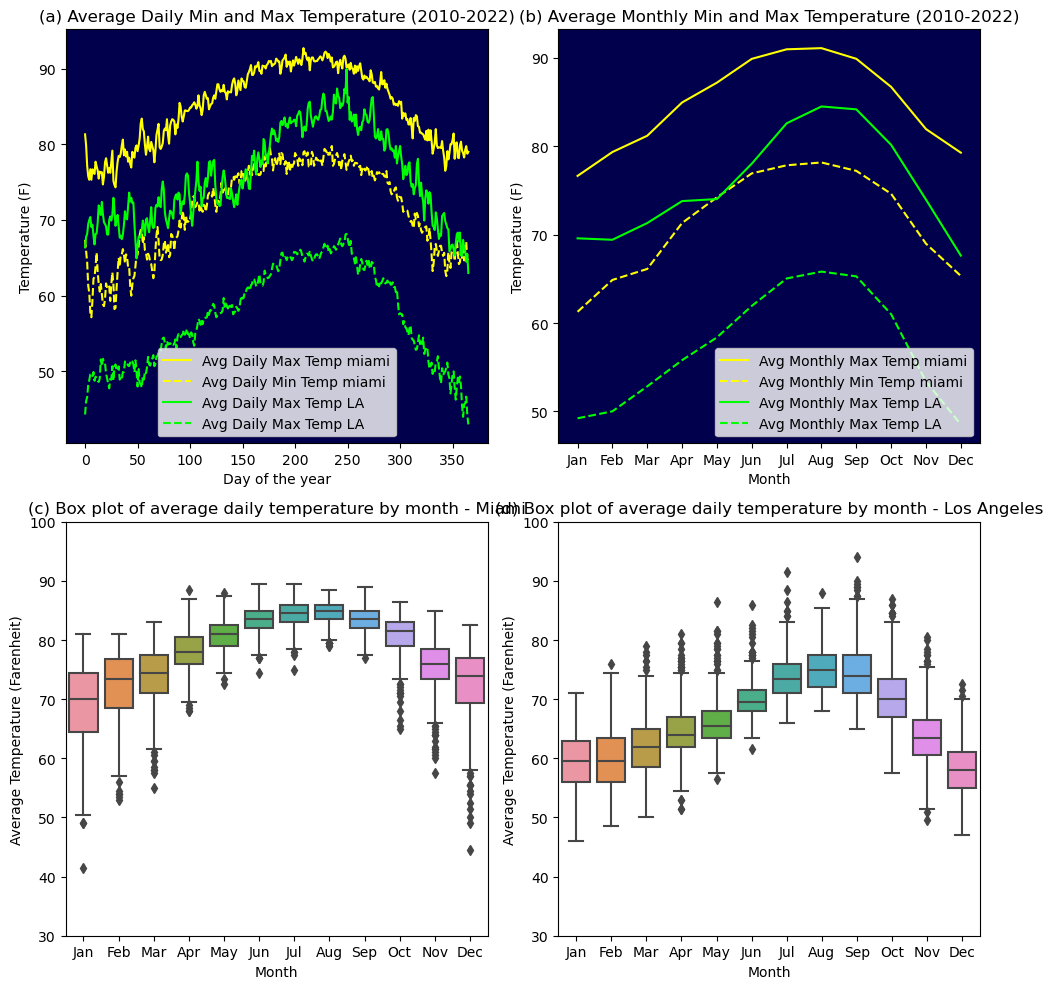

In [9]:

fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0][0].set_facecolor(fc)
ax[0][0].plot(miami_daily_avg.TMAX, color = c_miami, linestyle = '-', label = 'Avg Daily Max Temp miami')
ax[0][0].plot(miami_daily_avg.TMIN, color = c_miami, linestyle = '--', label = 'Avg Daily Min Temp miami')
ax[0][0].plot(la_daily_avg.TMAX, color = c_la, linestyle = '-', label = 'Avg Daily Max Temp LA')
ax[0][0].plot(la_daily_avg.TMIN, color = c_la, linestyle = '--', label = 'Avg Daily Max Temp LA')
ax[0][0].legend(loc='best')
ax[0][0].set_xlabel('Day of the year')
ax[0][0].set_ylabel('Temperature (F)')
ax[0][0].set_title('(a) Average Daily Min and Max Temperature (2010-2022)')

x = np.arange(0,12)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax[0][1].set_facecolor(fc)
ax[0][1].plot(miami_monthly_avg.TMAX, color = c_miami, linestyle = '-', label = 'Avg Monthly Max Temp miami')
ax[0][1].plot(miami_monthly_avg.TMIN, color = c_miami, linestyle = '--', label = 'Avg Monthly Min Temp miami')
ax[0][1].plot(la_monthly_avg.TMAX,  color = c_la, linestyle = '-', label = 'Avg Monthly Max Temp LA')
ax[0][1].plot(la_monthly_avg.TMIN,  color = c_la, linestyle = '--', label = 'Avg Monthly Max Temp LA')
ax[0][1].set_xticks(x,labels)
ax[0][1].legend(loc = 'best')
ax[0][1].set_xlabel('Month')
ax[0][1].set_ylabel('Temperature (F)')
ax[0][1].set_title('(b) Average Monthly Min and Max Temperature (2010-2022)')

plt.subplot(2,2,3)
x = np.arange(0,12)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(data = miami, y = 'TAVG', x = 'MONTH', ax = ax[1][0])
plt.xlabel('Month')
plt.ylabel('Average Temperature (Farenheit)')
plt.xticks(x,labels)
plt.title('(c) Box plot of average daily temperature by month - Miami')
plt.ylim(30,100)

plt.subplot(2,2,4)
x = np.arange(0,12)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(data = la, y = 'TAVG', x = 'MONTH')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Farenheit)')
plt.xticks(x,labels)
plt.title('(d) Box plot of average daily temperature by month - Los Angeles')
plt.ylim(30,100)
plt.tight_layout()


Text(0.5, 1.0, '(b) Std Dev of temp vs precipitation - Miami')

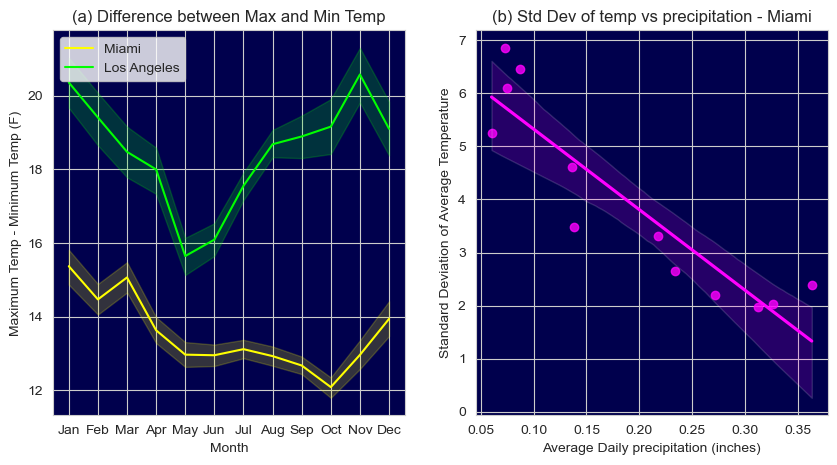

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x = np.arange(1, 13)
ax1.set_facecolor(fc)
plt.grid()
sns.lineplot(data = miami, x = 'MONTH', y = 'TDIFF', label = 'Miami', color = c_miami, ax = ax1)
sns.lineplot(data = la, x = 'MONTH', y = 'TDIFF', label = 'Los Angeles', color = c_la, ax = ax1)
ax1.set_title('(a) Difference between Max and Min Temp')
ax1.set_xticks(x, labels)
ax1.legend()
ax1.set_ylabel('Maximum Temp - Minimum Temp (F)')
ax1.set_xlabel('Month')

ax2.set_facecolor(fc)
ax2.grid()
sns.regplot(x = miami_monthly_avg.PRCP, y = miami_monthly_std.TAVG, color = 'fuchsia')
ax2.set_xlabel('Average Daily precipitation (inches)')
ax2.set_ylabel('Standard Deviation of Average Temperature')
ax2.set_title('(b) Std Dev of temp vs precipitation - Miami')

In [11]:
np.corrcoef(miami_monthly_avg.PRCP, miami_monthly_std.TAVG)

array([[ 1.        , -0.91059065],
       [-0.91059065,  1.        ]])

In [12]:
miami_monthly_avg['WFX'] = miami_monthly_avg['WSF2']*np.cos(miami_monthly_avg['WDF2'])
miami_monthly_avg['WFY'] = miami_monthly_avg['WSF2']*np.sin(miami_monthly_avg['WDF2'])

In [13]:
la_monthly_avg['WFX'] = la_monthly_avg['WSF2']*np.cos(la_monthly_avg['WDF2'])
la_monthly_avg['WFY'] = la_monthly_avg['WSF2']*np.sin(la_monthly_avg['WDF2'])

Text(0.5, 1.0, '(a) Average Wind Speed by Month')

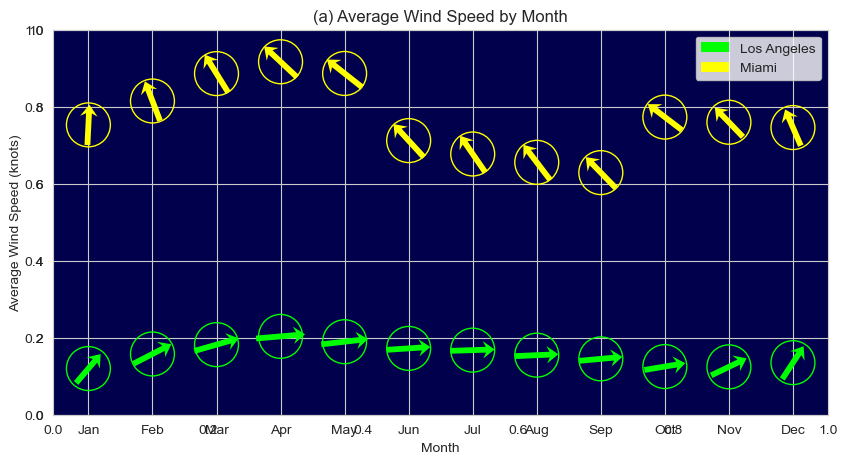

In [59]:
x = np.arange(0,12)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize = (10,5))
plt.grid()
ax = plt.axes()
ax.set_facecolor(fc)
plt.quiver(la_monthly_avg.index, la_monthly_avg.AWND, la_monthly_avg.WFX, la_monthly_avg.WFY, pivot = 'middle',  color = c_la, label = 'Los Angeles', headlength = 2, headaxislength = 1.5)
plt.scatter(la_monthly_avg.index, la_monthly_avg.AWND, s = 1000, facecolors = 'none', edgecolors = c_la)
plt.scatter(miami_monthly_avg.index, miami_monthly_avg.AWND, s = 1000, facecolors = 'none', edgecolors = c_miami)
plt.quiver(miami_monthly_avg.index, miami_monthly_avg.AWND, miami_monthly_avg.WFX, miami_monthly_avg.WFY, pivot = 'middle', color = c_miami,  label = 'Miami', headlength = 2, headaxislength = 1.5)
plt.ylim(0,10)
plt.legend()
plt.xlabel('Month')
plt.xticks(x, labels)
plt.ylabel('Average Wind Speed (knots)')
plt.title('(a) Average Wind Speed by Month')

In [15]:
la_monthly_avg['WSF2']


0      7.752750
1      8.698333
2      9.442500
3     10.056923
4      9.620099
5      8.917010
6      8.969077
7      8.863409
8      8.859318
9      8.490025
10     8.040470
11     8.017568
Name: WSF2, dtype: float64

Text(0.5, 1.05, '(b) Boxplot of average wind speed by month')

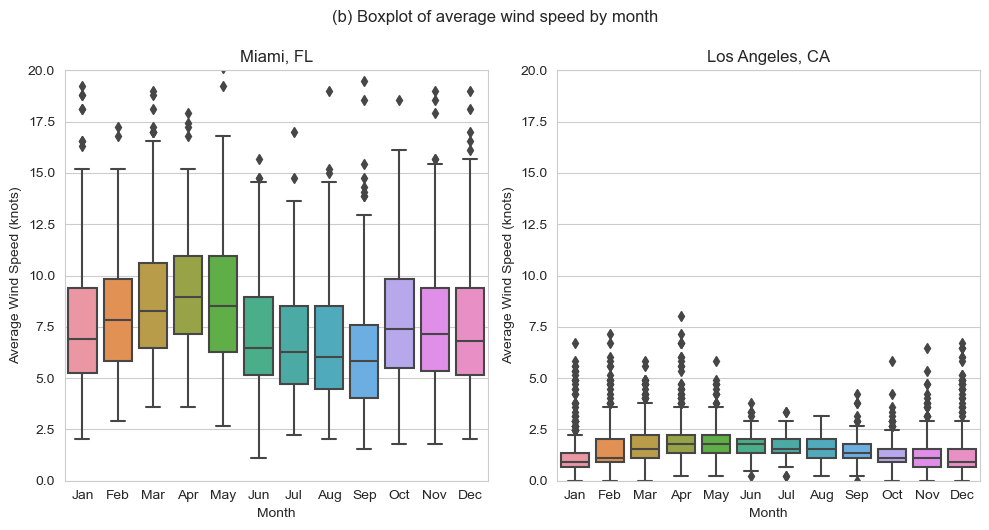

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
x = np.arange(12)
plt.subplot(121)
sns.boxplot(data = miami, x = 'MONTH', y = 'AWND')
plt.title('Miami, FL')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (knots)')
plt.xticks(x, labels)
plt.ylim(0,20)
plt.subplot(122)
sns.boxplot(data = la, x = 'MONTH', y = 'AWND')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (knots)')
plt.title('Los Angeles, CA')
plt.xticks(x, labels)
plt.ylim(0,20)
plt.tight_layout()
plt.suptitle('(b) Boxplot of average wind speed by month', y = 1.05)

### Precipitation

/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/2103308532.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  monthly_sum = miami_monthly_sum.append(la_monthly_sum)


NameError: name 'avg_precip_days_month_miami' is not defined

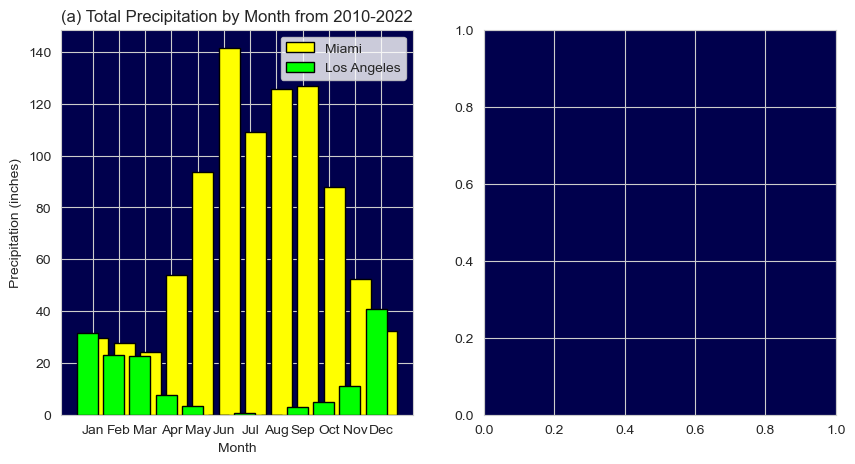

In [46]:

monthly_sum = miami_monthly_sum.append(la_monthly_sum)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

ax1.set_facecolor(fc)
x = np.arange(1,13)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.bar(x+0.2, miami_monthly_sum.PRCP, width=0.8, color = c_miami, edgecolor = 'black')
ax1.bar(x-0.2, la_monthly_sum.PRCP, width=0.8, color = c_la, edgecolor = 'black')
ax1.legend(['Miami', 'Los Angeles'])
ax1.set_xlabel('Month')
ax1.set_xticks(x, labels)
ax1.set_ylabel('Precipitation (inches)')
ax1.set_title('(a) Total Precipitation by Month from 2010-2022')

ax2.set_facecolor(fc)
sns.barplot(x = labels, y = avg_precip_days_month_miami, edgecolor = 'k',color = c_miami, label = 'Miami', ax = ax2)
sns.barplot(x = labels, y = avg_precip_days_month_la, edgecolor = 'k', color = c_la, label = 'Los Angeles', ax = ax2)
ax2.set_xlabel('Month')
ax2.set_title('(b) Average number of precipitation days by Month')
ax2.set_ylabel('Number of rainy days')
ax2.legend()
plt.tight_layout()



In [24]:
# Dataframe with only dry days
dry_miami = miami[miami.PRCP == 0]
dry_la = la[la.PRCP == 0]

# Dataframe with only wet days
precip_miami = miami[miami.PRCP == 0]
precip_la = la[la.PRCP == 0]

In [25]:
# Average temperature for dry and wet days during rainy season - Miami
miami_wet_months = np.arange(5, 11)
wet_miami_temp = [precip_miami[precip_miami.MONTH == i].TAVG.mean() for i in miami_wet_months]
dry_miami_temp = [dry_miami[dry_miami.MONTH == i].TAVG.mean() for i in miami_wet_months]

In [26]:
# Average temperature for dry and wet days during rainy season - LA
la_wet_months = [11,12,1,2,3]
wet_la_temp = [precip_la[precip_la.MONTH == i].TAVG.mean() for i in la_wet_months]
dry_la_temp = [dry_la[dry_la.MONTH == i].TAVG.mean() for i in la_wet_months]

Text(0.5, 1.05, 'Rainy Season Average Daily Temperature')

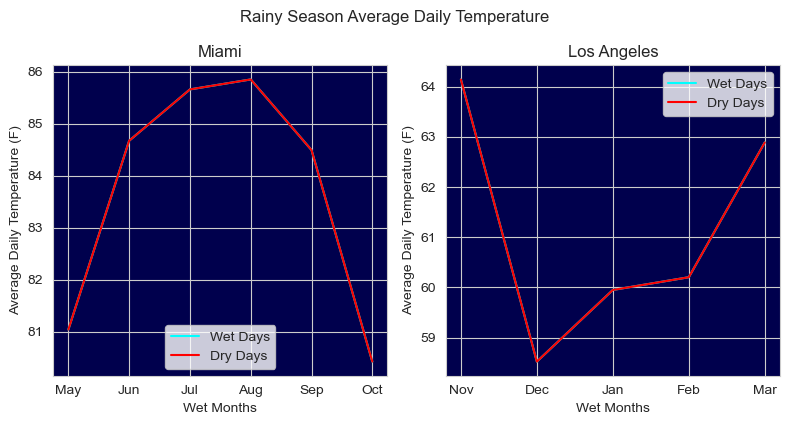

In [27]:
# Plot comparing average temperature for dry and wet days during rainy season 

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
ax1.set_facecolor(fc)
ax2.set_facecolor(fc)
sns.lineplot(x = miami_wet_months, y = wet_miami_temp, ax = ax1, color = 'aqua', label = 'Wet Days')
sns.lineplot(x = miami_wet_months, y = dry_miami_temp, ax = ax1, color = 'red', label = 'Dry Days')
ax1.set_title('Miami')
ax1.set_xlabel('Wet Months')
ax1.set_xticks(miami_wet_months, ['May', 'Jun', 'Jul', 'Aug', "Sep", 'Oct'])
ax1.set_ylabel('Average Daily Temperature (F)')
ax2.set_xlabel('Wet Months')
ax2.set_ylabel('Average Daily Temperature (F)')
ax2.set_title('Los Angeles')
sns.lineplot(x = range(len(la_wet_months)), y = wet_la_temp, ax = ax2, color = 'aqua', label = 'Wet Days')
sns.lineplot(x = range(len(la_wet_months)), y = dry_la_temp, ax = ax2, color = 'red', label = 'Dry Days')
ax2.set_xticks(range(len(la_wet_months)), ['Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
plt.tight_layout()
ax1.legend()
plt.suptitle('Rainy Season Average Daily Temperature', y = 1.05)

In [28]:
# A Dataframe of monthly average precip for every year - Miami
monthly_precip_miami = {}
monthly_temp_miami = {}
for i,y in enumerate(miami.YEAR.unique()):
    monthly_precip_miami[str(y)] = [miami[(miami.YEAR == y) & (miami.MONTH==m)].PRCP.sum() for m in miami.MONTH.unique()]
    monthly_temp_miami[str(y)] = [miami[(miami.YEAR == y) & (miami.MONTH==m)].TAVG.mean() for m in miami.MONTH.unique()]
monthly_precip_miami = pd.DataFrame(monthly_precip_miami)
monthly_temp_miami = pd.DataFrame(monthly_temp_miami)


In [29]:
# A Dataframe of monthly average precip for every year - Miami
monthly_precip_la = {}
monthly_temp_la = {}
for i,y in enumerate(la.YEAR.unique()):
    monthly_precip_la[str(y)] = [la[(la.YEAR == y) & (la.MONTH==m)].PRCP.sum() for m in la.MONTH.unique()]
    monthly_temp_la[str(y)] = [la[(la.YEAR == y) & (la.MONTH==m)].TAVG.mean() for m in la.MONTH.unique()]
monthly_precip_la = pd.DataFrame(monthly_precip_la)
monthly_temp_la = pd.DataFrame(monthly_temp_la)

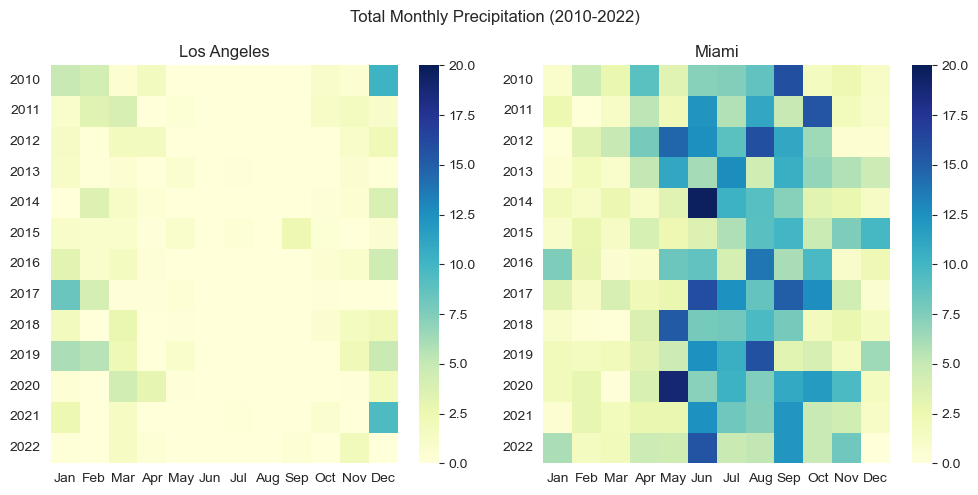

In [30]:
# Heatmap of monthly total precip for every year (2010-2022)
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.heatmap(monthly_precip_la.transpose(), vmin = 0, vmax = 20, cmap = 'YlGnBu')
plt.xticks(np.arange(0.5, 12.5, 1), labels)
plt.title('Los Angeles')

plt.subplot(122)
sns.heatmap(monthly_precip_miami.transpose(), vmin = 0, vmax = 20, cmap = 'YlGnBu')
plt.xticks(np.arange(0.5, 12.5, 1), labels)
plt.title('Miami')
plt.suptitle('Total Monthly Precipitation (2010-2022)')

plt.tight_layout()

## Hurricane Analysis Miami

In [31]:
# Indexing miami dataframe for hurricane Irma dates
irma = miami[miami.DATE >= '2017-08-30'][miami.DATE <= '2017-09-13'][['DATE', 'YEAR', 'PRCP', 'AWND', 'WSF2', 'WDF2']]

/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/412377006.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  irma = miami[miami.DATE >= '2017-08-30'][miami.DATE <= '2017-09-13'][['DATE', 'YEAR', 'PRCP', 'AWND', 'WSF2', 'WDF2']]


In [32]:
ian = miami[miami.DATE >= '2022-09-23'][miami.DATE <= '2022-10-02'][['DATE', 'YEAR', 'PRCP', 'AWND', 'WSF2', 'WDF2']]
nicole = miami[miami.DATE >= '2022-11-07'][miami.DATE <= '2022-11-12'][['DATE', 'YEAR', 'PRCP', 'AWND', 'WSF2', 'WDF2']]
sally = miami[miami.DATE >= '2020-09-10'][miami.DATE <= '2020-09-15'][['DATE', 'YEAR', 'PRCP', 'AWND', 'WSF2', 'WDF2']]
michael = miami[miami.DATE >= '2018-10-06'][miami.DATE <= '2018-10-16'][['DATE', 'YEAR', 'PRCP', 'AWND', 'WSF2', 'WDF2']]
matthew = miami[miami.DATE >= '2016-09-28'][miami.DATE <= '2016-10-10'][['DATE', 'YEAR', 'PRCP', 'AWND', 'WSF2', 'WDF2']]
hurricanes = [matthew, irma, michael, sally, nicole, ian]
names = ['Matthew', 'Irma', 'Michael', 'Sally', 'Nicole', 'Ian']

/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/213758664.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ian = miami[miami.DATE >= '2022-09-23'][miami.DATE <= '2022-10-02'][['DATE', 'YEAR', 'PRCP', 'AWND', 'WSF2', 'WDF2']]
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/213758664.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nicole = miami[miami.DATE >= '2022-11-07'][miami.DATE <= '2022-11-12'][['DATE', 'YEAR', 'PRCP', 'AWND', 'WSF2', 'WDF2']]
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/213758664.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sally = miami[miami.DATE >= '2020-09-10'][miami.DATE <= '2020-09-15'][['DATE', 'YEAR', 'PRCP', 'AWND', 'WSF2', 'WDF2']]
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/213758664.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  michael =

In [33]:
# Dataframe of recent hurricanes

recent = pd.DataFrame()

recent['YEAR'] = [h.YEAR.max() for h in hurricanes]
recent['AWND'] = [h.AWND.max() for h in hurricanes]
recent['PRCP'] = [h.PRCP.max() for h in hurricanes]
recent['WSF2'] = [h.WSF2.max() for h in hurricanes]
recent['WDF2'] = [h.WDF2.max() for h in hurricanes]
recent['NAME'] = [n for n in names]
recent['START'] = [h.DATE.min() for h in hurricanes]
recent['END'] = [h.DATE.max() for h in hurricanes]

recent['WDF2'] = np.rad2deg(recent.WDF2 + math.pi/2)
recent

,YEAR,AWND,PRCP,WSF2,WDF2,NAME,START,END
0,2016,12.53,0.92,23.0,-40.0,Matthew,2016-09-28,2016-10-10
1,2017,38.48,5.18,53.0,-60.0,Irma,2017-08-30,2017-09-13
2,2018,18.57,0.20,25.9,-80.0,Michael,2018-10-06,2018-10-16
3,2020,14.09,1.75,31.1,-70.0,Sally,2020-09-10,2020-09-15
4,2022,11.41,1.35,21.9,-30.0,Nicole,2022-11-07,2022-11-12
5,2022,18.57,3.54,31.1,-30.0,Ian,2022-09-23,2022-10-02


## LA Air Quality and Weather Analysis

In [192]:
# Read air quality data
laaq =  pd.read_csv('airQuality.csv')
def normalize(x):
    return (x - x.mean())/x.std()

In [193]:
laaq = laaq.rename(columns = {'date':'DATE'})

In [194]:
laaq['pollution'] = normalize(laaq[' pm25']) + (laaq[' pm10']) + (laaq[' no2']) + (laaq[' co'])

In [199]:
laaq = laaq.dropna()
laaq.DATE = pd.to_datetime(laaq.DATE)
laaq['month'] = pd.DatetimeIndex(laaq.DATE).month

/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/2332464896.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  laaq_monthly = laaq.groupby('month').mean()


Text(0.5, 1.05, '(a) Monthly average pollutant concentration (μg/m3)')

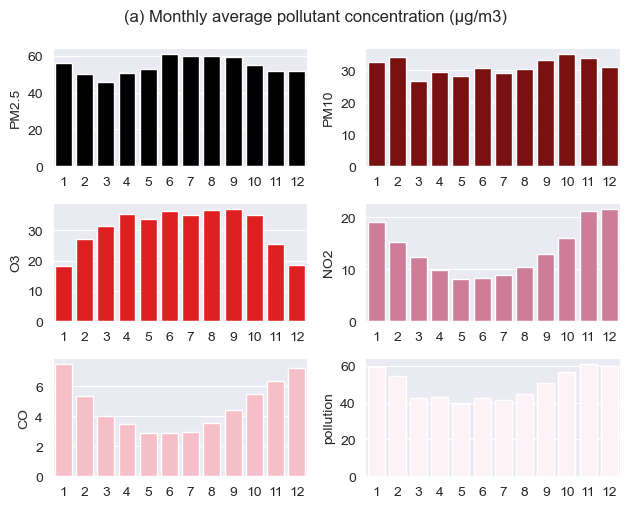

In [297]:
# Pollutant concentrations by month
laaq_monthly = laaq.groupby('month').mean()
ax = plt.axes()
ax.set_facecolor(fc)
pollutants = ['PM2.5', 'PM10', 'O3', 'NO2', "CO", 'pollution']
colors = ['black','darkred', 'red', 'palevioletred', 'lightpink', 'lavenderblush']
for i,c in enumerate(laaq_monthly.columns[:-1]):
    plt.subplot(3,2,i+1)
    sns.set_style('darkgrid')
    sns.barplot(data = laaq_monthly, x = np.arange(1,13), y = c, color = colors[i])
    plt.ylabel(pollutants[i])
plt.tight_layout()
plt.suptitle('(a) Monthly average pollutant concentration (\u03BCg/m3)', y = 1.05)

In [171]:
laaq_monthly.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

In [162]:
laaq

,DATE,pm25,pm10,o3,no2,co,pollution,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,MONTH,YEAR,TDIFF
0,2022-11-02,54.0,13.0,27.0,8.0,2.0,22.977278,2.46,0.11,60.0,67.0,53.0,-6.108652,8.9,11,2022,14.0
1,2022-11-03,23.0,15.0,30.0,6.0,1.0,20.719129,3.80,0.00,57.0,65.0,49.0,-6.632251,10.1,11,2022,16.0
2,2022-11-04,15.0,18.0,26.0,18.0,3.0,37.394445,0.89,0.00,57.0,67.0,47.0,-6.283185,8.1,11,2022,20.0
3,2022-11-05,24.0,28.0,26.0,24.0,5.0,55.759715,0.89,0.00,58.5,69.0,48.0,-6.108652,6.9,11,2022,21.0
4,2022-11-06,46.0,26.0,4.0,25.0,8.0,58.652595,1.12,0.00,60.0,69.0,51.0,-6.108652,6.9,11,2022,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,2014-03-28,40.0,33.0,20.0,5.0,4.0,41.409082,3.13,0.00,63.5,71.0,56.0,-6.457718,12.1,3,2014,15.0
3050,2014-03-29,53.0,37.0,10.0,4.0,5.0,45.936693,1.79,0.00,64.5,76.0,53.0,-6.283185,10.1,3,2014,23.0
3051,2014-03-30,59.0,17.0,3.0,1.0,3.0,21.180206,2.68,0.00,64.0,72.0,56.0,-6.283185,13.0,3,2014,16.0
3052,2014-03-31,27.0,25.0,30.0,3.0,3.0,29.881471,3.36,0.00,61.0,68.0,54.0,-6.457718,13.0,3,2014,14.0


In [299]:
laaq.columns

Index(['DATE', ' pm25', ' pm10', ' o3', ' no2', ' co', 'pollution', 'MONTH',
       'month'],
      dtype='object')

Text(0.5, 1.05, '(b) Distribution of Pollutants (μg/m3)')

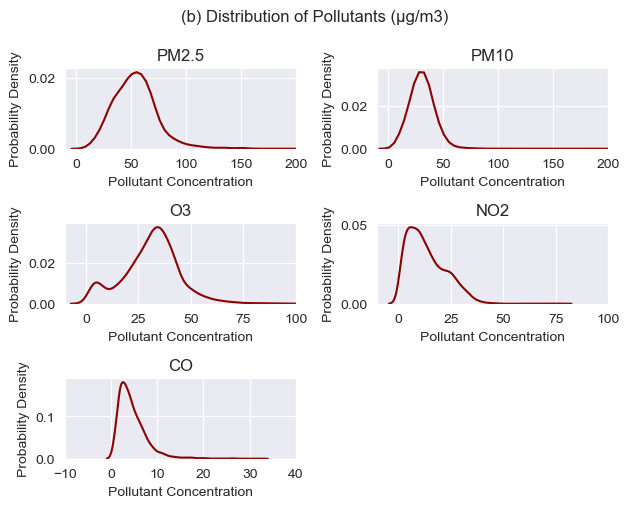

In [300]:
# Plotting distribution of pollutants
limits = [200,200,100,100,40]
for i,c in enumerate(laaq.columns[1:6]):
    ax = plt.axes()
    plt.subplot(3,2,i+1)
    plt.title(pollutants[i])
    sns.kdeplot(laaq[c], color = 'darkred')
    plt.tight_layout()
    plt.ylabel('Probability Density')
    plt.xlabel('Pollutant Concentration')
    plt.xlim(-10, limits[i])

plt.suptitle('(b) Distribution of Pollutants (\u03BCg/m3)', y = 1.05)

### Sounding Data

In [47]:
# Loading Miami and LA sounding data
miami_sounding = pd.read_csv(r'/Users/raghavsharma/Library/CloudStorage/OneDrive-Stanford/Fall 22/CEE 263C/Project/miami_sounding.csv')
la_sounding = pd.read_csv(r'/Users/raghavsharma/Library/CloudStorage/OneDrive-Stanford/Fall 22/CEE 263C/Project/la_sounding_3dec.csv')

In [48]:
# Cleaning Sounding Data
miami_sounding = miami_sounding[1:].astype(float).sort_values(by = 'HGHT').reset_index(drop=True)
la_sounding = la_sounding[1:].astype(float).sort_values(by = 'HGHT').reset_index(drop=True)

In [50]:
# COnverting wind direction to correct format
miami_sounding.DRCT = -90 - miami_sounding.DRCT
la_sounding.DRCT = -90 - la_sounding.DRCT

In [219]:
# Calculating Lapse Rates
def getlr(data):
    x = len(data)
    index = np.arange(0,x,2)
    data = data.iloc[index,:]
    LR = -(data.TEMP[1:].to_numpy() - data.TEMP[:-1].to_numpy())/(data.HGHT[1:].to_numpy() - data.HGHT[:-1].to_numpy())*1000
    stability = ['Stable' if LR[i]>10 else 'Conditionally Unstable' if LR[i]>8 else 'Unstable' for i in range(len(LR))]
    return LR, data.TEMP[1:], data.HGHT[1:], stability

/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/2874329277.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  LR = -(data.TEMP[1:].to_numpy() - data.TEMP[:-1].to_numpy())/(data.HGHT[1:].to_numpy() - data.HGHT[:-1].to_numpy())*1000
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel_1159/2874329277.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return LR, data.TEMP[1:], data.HGHT[1:], stability
/var/folders/9v/gbghw4697p5219tnn983g81w0000gn/T/ipykernel

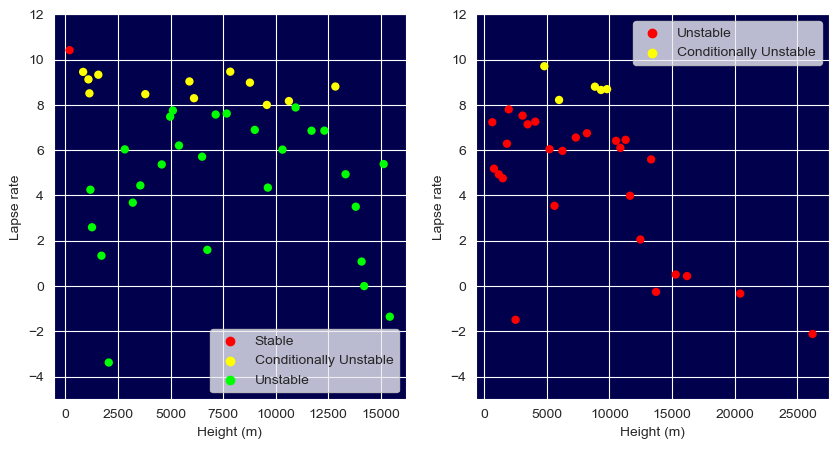

In [220]:
# PLotting stability with height
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.set_facecolor(fc)
lr = getlr(miami_sounding)[0]
height = getlr(miami_sounding)[2]
stability = getlr(miami_sounding)[3]
sns.scatterplot(x = height, y=lr, hue=stability, palette= ['red', 'yellow', 'lime'], ax = ax1, linewidth =0)
ax1.set_ylim(-5,12)
ax1.set_ylabel('Lapse rate')
ax1.set_xlabel('Height (m)')
ax1.legend()

ax2.set_facecolor(fc)
lr = getlr(la_sounding)[0]
height = getlr(la_sounding)[2]
stability = getlr(la_sounding)[3]
sns.scatterplot(x = height, y=lr, hue=stability, palette= ['red', 'yellow', 'lime'], ax = ax2, linewidth =0)
ax2.set_ylim(-5,12)
ax2.set_ylabel('Lapse rate')
ax2.set_xlabel('Height (m)')
ax2.legend()

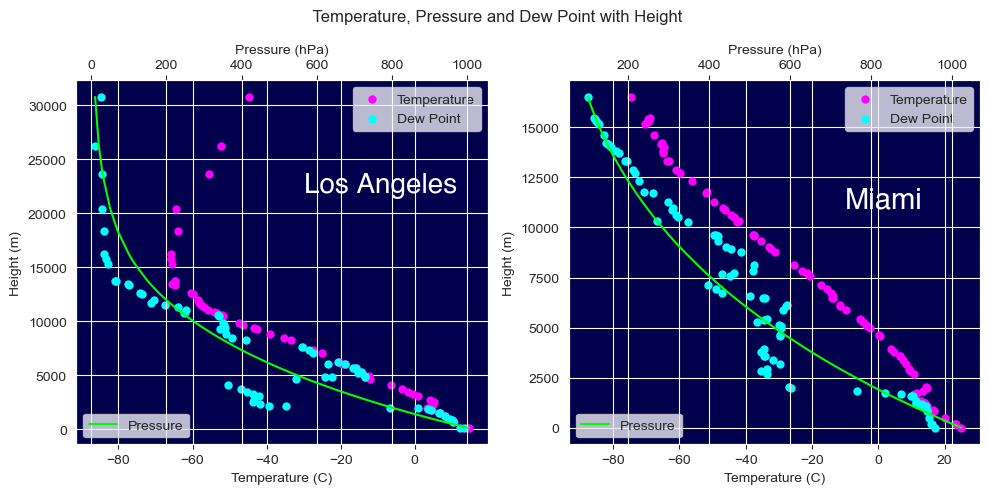

In [249]:
# PLotting vertical variation of temp, dewpt, and pressure

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))

ax1.set_facecolor(fc)
sns.scatterplot(data = la_sounding, x = 'TEMP', y = 'HGHT', color = 'fuchsia', linewidth =0, ax = ax1, label = 'Temperature')
sns.scatterplot(data = la_sounding, x = 'DWPT', y = 'HGHT', color = 'aqua', linewidth =0, ax = ax1, label = 'Dew Point')
ax3 = ax1.twiny()
sns.lineplot(data = la_sounding, x = 'PRES', y='HGHT', color = 'lime', ax = ax3, label = 'Pressure')
ax1.text(-30, 22000, 'Los Angeles', fontsize = 20, color = 'white', font = 'Helvetica')
ax1.set_ylabel('Height (m)')
ax3.set_xlabel('Pressure (hPa)')
plt.legend(loc = 'lower left')
ax1.set_xlabel('Temperature (C)')

ax2.set_facecolor(fc)
sns.scatterplot(data = miami_sounding, x = 'TEMP', y = 'HGHT', color = 'fuchsia', linewidth =0, ax = ax2, label = 'Temperature')
sns.scatterplot(data = miami_sounding, x = 'DWPT', y = 'HGHT', color = 'aqua', linewidth =0, ax = ax2, label = 'Dew Point')
ax4 = ax2.twiny()
sns.lineplot(data = miami_sounding, x = 'PRES', y='HGHT', color = 'lime', ax = ax4, label = 'Pressure')
ax2.text(-10, 11000, 'Miami', fontsize = 21, color = 'white', font = 'Helvetica', weight = 'bold')
ax2.set_ylabel('Height (m)')
ax2.set_xlabel('Temperature (C)')
plt.legend(loc='lower left')
ax4.set_xlabel('Pressure (hPa)')

plt.suptitle(' Temperature, Pressure and Dew Point with Height')
plt.tight_layout()


In [54]:
# Finding height of clouds
def clouds(data):
    cloud_index = data[data.DWPT >= data.TEMP].index
    cloud_heights = data.iloc[cloud_index,:].HGHT
    return cloud_heights.to_numpy()

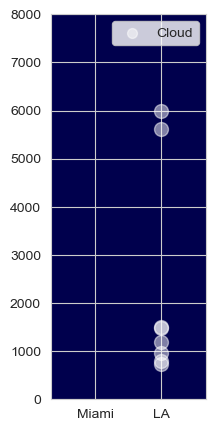

In [55]:
# PLotting cloud height
plt.figure(figsize=(2,5))
miami_clouds = clouds(miami_sounding)
la_clouds = clouds(la_sounding)
ax = plt.axes()
ax.set_facecolor(fc)
plt.scatter(np.zeros(len(miami_clouds))+0.2,miami_clouds,  marker = 'o', s = 50, alpha = 0.5, facecolors = 'white')
plt.scatter(np.ones(len(la_clouds))/2,la_clouds,  marker = 'o', s = 100, alpha = 0.5, facecolors = 'white')
plt.ylim(0, 30000)
plt.xlim(0,0.7)
plt.ylim(0,8000)
plt.xticks([0.2,0.5],['Miami', 'LA'])
plt.legend(['Cloud'])


In [57]:
# COnverting wind direction data to radians
for d in [miami_sounding, la_sounding]:
    d['DRCT'] = np.deg2rad(d['DRCT'])
    d['U'] = d.SKNT * np.cos(d.DRCT)
    d['V'] = d.SKNT * np.sin(d.DRCT)

Text(0.5, 1.0, 'Arrow length denotes wind speed')

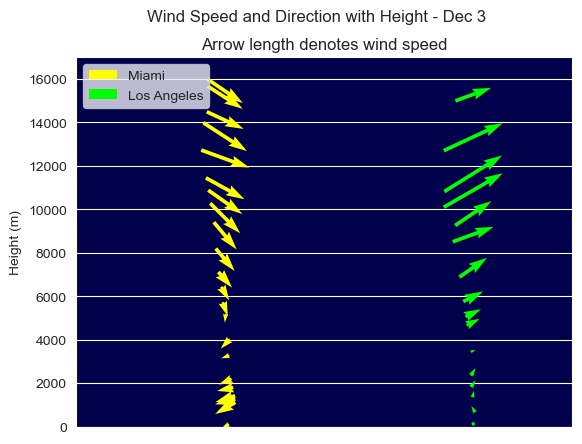

In [282]:
# PLotting vertical variation of wind speed and direction
x = np.zeros(len(miami_sounding)) + 0.5
index_x = np.arange(0,len(x),4)
x = x[index_x]
y = np.ones(len(la_sounding))
index_y = np.arange(0,len(y),4)
y = y[index_y]
ax = plt.axes()
ax.set_facecolor(fc)
plt.quiver(x, miami_sounding.HGHT[index_x], miami_sounding.U[index_x], miami_sounding.V[index_x], color = c_miami, pivot = 'middle', label = 'Miami')
plt.quiver(y, la_sounding.HGHT[index_y], la_sounding.U[index_y], la_sounding.V[index_y], color = c_la, pivot = 'middle', label = 'Los Angeles')
plt.ylim(-10,17000)
plt.xlim(0.2,1.2)
plt.legend()
plt.ylabel('Height (m)')
plt.xticks([])
plt.suptitle('Wind Speed and Direction with Height - Dec 3')
plt.title('Arrow length denotes wind speed')
